In [118]:
import sys, os
from matplotlib import pyplot
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import math
 

In [53]:

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 

In [54]:
# define cnn model
def define_model_VGG8():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [57]:
# CODE MODIFIED FROM TF: Save and load models
def eval_fresh_model():
    
    model = define_model_VGG8()
    # Evaluate the model
    trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    loss, acc = model.evaluate(testX, testY, verbose=2)
    print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))
    
    return model

untrained_model = eval_fresh_model()
untrained_model.summary()

KeyboardInterrupt: 

In [58]:
# run the test harness for evaluating a model
def eval_trained_model():

    file_dir = os.path.dirname(os.path.realpath('__file__')) #<-- absolute dir this file is in
    abs_file_path_chkpt = os.path.join(file_dir, 'vgg_8_checkpoints/vgg8.chkpt')
   
    model = define_model_VGG8()
    model.load_weights(abs_file_path_chkpt)
    # Evaluate the model
    trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    loss, acc = model.evaluate(testX, testY, verbose=2)
    print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))
    
    return model

trained_model= eval_trained_model()  
trained_model.summary()  



313/313 - 4s - loss: 0.5644 - accuracy: 0.8299
Untrained model, accuracy: 82.99%
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 16, 16, 64)        36928     
______________________________________

(1, 32, 32, 3)
(1, 32, 32, 3)
/Users/andrewweng/Developer/pyvenvs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


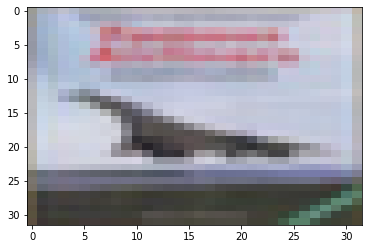

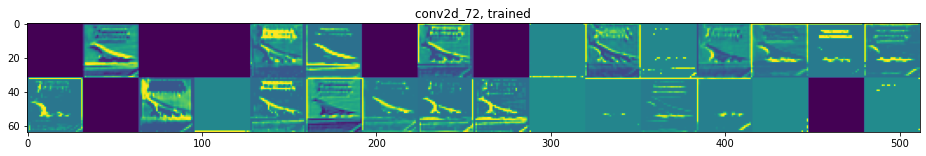

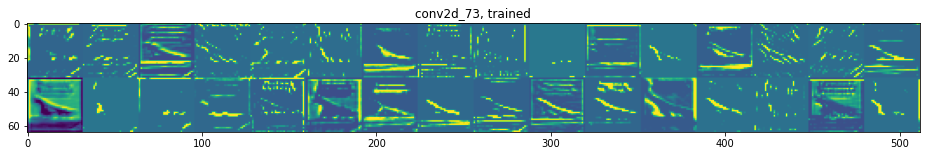

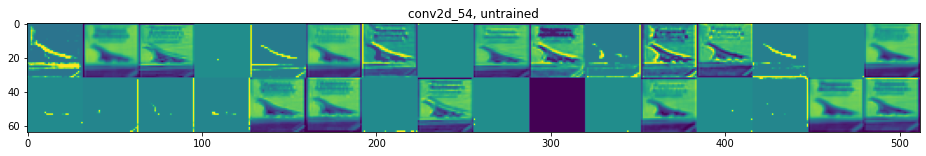

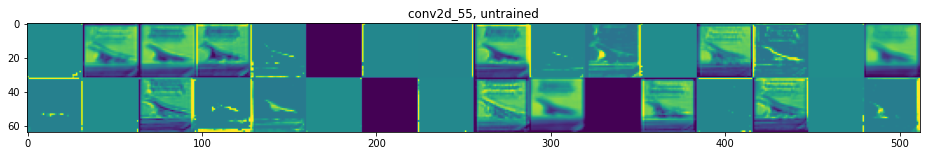

In [135]:

# MODIFIED FROM: Visualizing intermediate activation in Convolutional Neural Networks with Keras

# model.summary()

# sampleX = sampleX.reshape(1,32,32,3)
# print(sampleX.shape)

# layer = model.layers[0]
# layer_1_output = layer_1.output
# activation_model = Model(inputs=model.input, outputs=layer_1_output)
# layer_1_activations = activation_model.predict(sampleX)

# print(layer_1_activations.shape)

# plt.matshow(layer_1_activations[0, :, :, 4], cmap='viridis')


# layer_names = []
# for layer in model.layers[:12]:
#     layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

# layer_names = layer_1.name


def vis_top_2_activations(model, sampleX, model_type):

    sampleX = sampleX.reshape(1,32,32,3)
    print(sampleX.shape)


    layer_outputs = [layer.output for layer in model.layers[:2]] # Extracts the outputs of the top 12 layers
    activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
    activations = activation_model.predict(sampleX) # Returns a list of five Numpy arrays: one array per layer activation

    images_per_row = 16

    layer_names = []
    for layer in model.layers[:2]:
        layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
        

    for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).

        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                feature_image = layer_activation[0,:,:,col * images_per_row + row]
                feature_image -= feature_image.mean() # Post-processes the feature to make it visually palatable
                feature_image /= feature_image.std()
                feature_image *= 64
                feature_image += 128


                feature_image = np.clip(feature_image,0,255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                        row * size : (row + 1) * size] = feature_image
     

                # total_display_grid = np.zeros((display_grid.shape[0],display_grid.shape[1]))
                # total_display_grid[:,:] = display_grid
                # total_display_grid[:,:,1] = display_grid_channel_2
                # total_display_grid[:,:,2] = display_grid_channel_3

                # print(total_display_grid.shape)

                
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name + ", " + model_type) 
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')


trainX, trainY, testX, testY = load_dataset()
sampleX = testX[3,:,:,:]
plt.imshow(sampleX, aspect='auto', cmap='viridis')



vis_top_2_activations(trained_model,sampleX,"trained")
vis_top_2_activations(untrained_model,sampleX,"untrained")



(1, 32, 32, 3)
(1, 32, 32, 3)
/Users/andrewweng/Developer/pyvenvs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


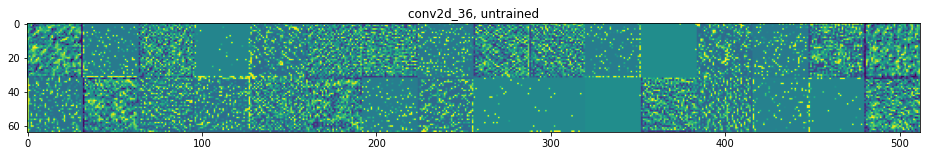

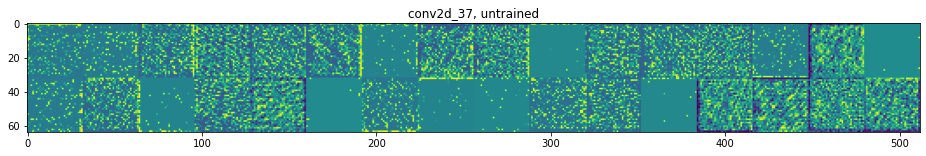

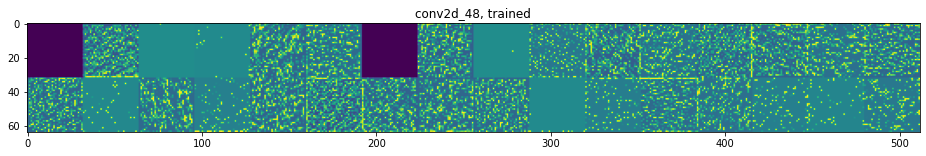

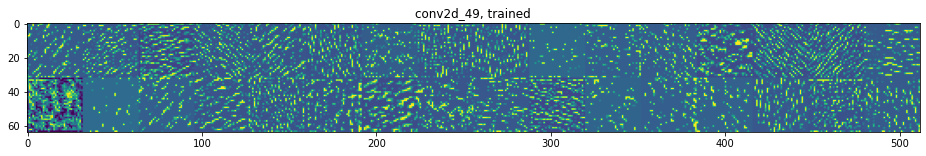

In [47]:

def vis_top_2_null_image(model,model_type):

    sampleX = np.random.rand(1,32,32,3)
    sampleX = sampleX * 255
    print(sampleX.shape)


    layer_outputs = [layer.output for layer in model.layers[:2]] # Extracts the outputs of the top 12 layers
    activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
    activations = activation_model.predict(sampleX) # Returns a list of five Numpy arrays: one array per layer activation

    images_per_row = 16

    layer_names = []
    for layer in model.layers[:2]:
        layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
        

    for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                :, :,
                                                col * images_per_row + row]
                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                            row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name + ", " + model_type)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')


vis_top_2_null_image(untrained_model,"untrained")
vis_top_2_null_image(trained_model,"trained")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


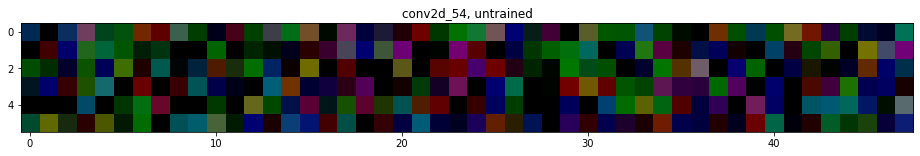

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


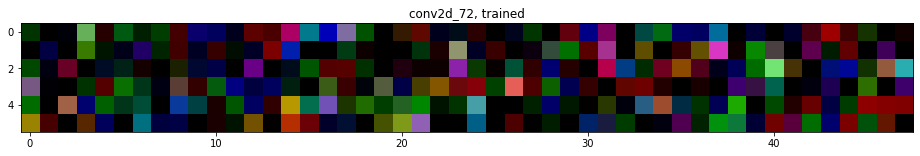

In [114]:

def vis_top_2_weights(model, model_type):

    # sampleX = np.random.rand(1,32,32,3)
    # sampleX = sampleX * 255
    # # print(sampleX.shape)

    # layer_1 = model.layers[0]
    # layer_1_weights,biases = layer_1.get_weights()
    # # print(layer_1_weights.shape)

    # # print(layer_1_weights.shape)
    # # print(layer_1_weights[0].shape)

    # plt.imshow(layer_1_weights[:,:,0,0])
    # plt.show()

    
    # layer_weights = [layer.output for layer in model.layers[:2]] # Extracts the outputs of the top 12 layers

    # activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
    # activations = activation_model.predict(sampleX) # Returns a list of five Numpy arrays: one array per layer activation

    images_per_row = 16

    layer_names = []
    for layer in model.layers[:2]:
        layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot


    # layers = model.layers[:2]
    weights,biases = [layer.get_weights() for layer in model.layers[:2]]

    layer_1_name = layer_names[0]
    layer_2_name = layer_names[1]
    layer_1_weights = weights[0]
    layer_2_weights = weights[0]
     
    images_per_row = 16
    

    n_filters = layer_1_weights.shape[-1] # Number of features in the feature map
    size = layer_1_weights.shape[0] #The feature map has shape (1, size, size, n_features).
    n_cols = n_filters // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size,3))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_1_weights[:,:, :,col * images_per_row + row]
            # channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            # channel_image /= channel_image.std()
            # channel_image *= 64
            # channel_image += 128
            # channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                        row * size : (row + 1) * size,:] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_1_name + ", " + model_type)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

    return layer_1_weights



untrained_weights = vis_top_2_weights(untrained_model, "untrained")
trained_weights = vis_top_2_weights(trained_model, "trained")


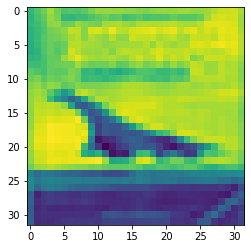

(3, 3)
done
done
done


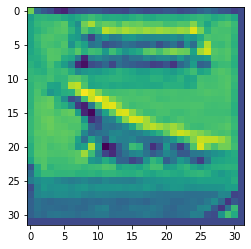

In [140]:

#pad the image with the floor of width/2
def zero_pad_image(image, filter_width):
    pad_width = math.floor((filter_width/2))
    return np.pad(image,pad_width)

def findOperationIndexPairs(idx,n,opType):
    indexPairs = []
    dist_to_corner = int((n/2))

    # the starting point (top left) of the image based on the filter size.
    img_start_idx = (idx[0] - dist_to_corner, idx[1]-dist_to_corner)

    for i in range(n):
        for j in range(n):
            x_img = img_start_idx[0] + i
            y_img = img_start_idx[1] + j

            # cross correlation OPTYPE 1
            if opType == 1:
                x_ker = i
                y_ker = j
                indexPairs.append(((x_img,y_img),(x_ker,y_ker)))
            
            # convolution OPTYPE 0
            # flip filter vertically and horizontally
            if opType == 0:
                x_ker = (n-1) - i
                y_ker = (n-1) - j
                indexPairs.append(((x_img,y_img),(x_ker,y_ker)))

    return indexPairs


def convolution_xcorrelation(f, I, optype):

    # print(f)

    # print("original image dims:",I.shape)
    filter_width = f.shape[0]

    image_width = I.shape[1]
    image_height = I.shape[0]

    pad_width = math.floor((filter_width/2))
    # print("pad width:",pad_width)

    I_padded = zero_pad_image(I,filter_width)
    # print("padded image dims:",I_padded.shape)
    

    im_out = np.zeros((I.shape[0],I.shape[1]))
    

    top_left_image_idx = (pad_width,pad_width)
    bottom_right_image_idx = (pad_width+image_height-1,pad_width+image_width-1)
    # print("top left image idx",top_left_image_idx)
    # print("bottom right image idx", bottom_right_image_idx)
  

    for i in range(top_left_image_idx[0], bottom_right_image_idx[0]):
        for j in range(top_left_image_idx[1], bottom_right_image_idx[1]):

            image_pixel = (i,j)

            # pass optype to the function we created in an earlier assignment
            index_pairs = findOperationIndexPairs(image_pixel,filter_width,optype)
   
            val_sum = 0
            for pairing in index_pairs:
                image_idx = pairing[0]
                filter_idx = pairing[1]
                val_sum += I_padded[image_idx[0],image_idx[1]] * f[filter_idx[0],filter_idx[1]]

            im_out[(i-pad_width),(j-pad_width)] = val_sum 


    print("done")
    
 
    return im_out

trainX, trainY, testX, testY = load_dataset()
sampleX = testX[3,:,:,:]

plt.imshow(sampleX[:,:,0])
plt.show()

sampleXc1 = sampleX[:,:,0]
sampleXc2 = sampleX[:,:,1]
sampleXc3 = sampleX[:,:,2]


# filter_1 = trained_weights[:,:,:,1]
f1c1 = filter_1[:,:,0]
f1c2 = filter_1[:,:,1]
f1c3 = filter_1[:,:,2]

print(f1c1.shape)

f = np.array([[1,1,1],
            [0,0,0],
            [-1,-1,1]

])

im_out = convolution_xcorrelation(f1c1,sampleXc1,0)
im_out += convolution_xcorrelation(f1c2,sampleXc2,0)
im_out += convolution_xcorrelation(f1c3,sampleXc3,0)


im = np.zeros((sampleX.shape[0],sampleX.shape[1]))

# im[:,:,1] = f1c2_out
# im[:,:,2] = f1c3_out



plt.imshow(im_out)
plt.show()




{'loss': [0.7294281125068665, 0.7062692642211914, 0.691728413105011, 0.6936626434326172, 0.6920300126075745], 'accuracy': [0.47187501192092896, 0.5140625238418579, 0.5375000238418579, 0.5093749761581421, 0.528124988079071], 'val_loss': [0.6968964338302612, 0.6933646202087402, 0.6893271207809448, 0.6930577754974365, 0.6940741539001465], 'val_accuracy': [0.4781250059604645, 0.4937500059604645, 0.550000011920929, 0.5093749761581421, 0.49687498807907104]}


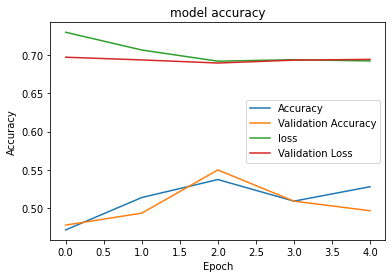

In [19]:


print(hist.history)

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()